In [ ]:
####         The entire code is written, modified and executed by          ###
###                          Sheekar Banerjee                              ###
###                      AI-ML Software Engineer                           ###
###                       Titan Technologies ltd.                          ###
###         Sister Concern of Cisscom LLC, Irvine, California, USA         ###

In [4]:
!pip install fastai --upgrade
!pip install nbdev

     |████████████████████████████████| 188 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


     |████████████████████████████████| 49 kB 2.8 MB/s 
     |████████████████████████████████| 51 kB 304 kB/s 
     |████████████████████████████████| 561 kB 11.1 MB/s 
     |████████████████████████████████| 130 kB 43.3 MB/s 
     |████████████████████████████████| 428 kB 39.7 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado

In [2]:
from fastai.vision.all import *

In [3]:
path = "/content/drive/MyDrive/Alzheimer_s Dataset"
size = 224
bs = 64

In [4]:
# data = DataBlock(blocks=(ImageBlock,CategoryBlock),
#                  get_items=get_image_files,
#                  splitter=RandomSplitter(),
#                 get_y=parent_label,
#                 item_tfms=RandomResizedCrop(224,min_scale=0.3),
#                 batch_tfms=aug_transforms())

data = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                get_y=parent_label,
                item_tfms=Resize(224),
                batch_tfms=aug_transforms())

In [5]:
dls = data.dataloaders(path,bs=64)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

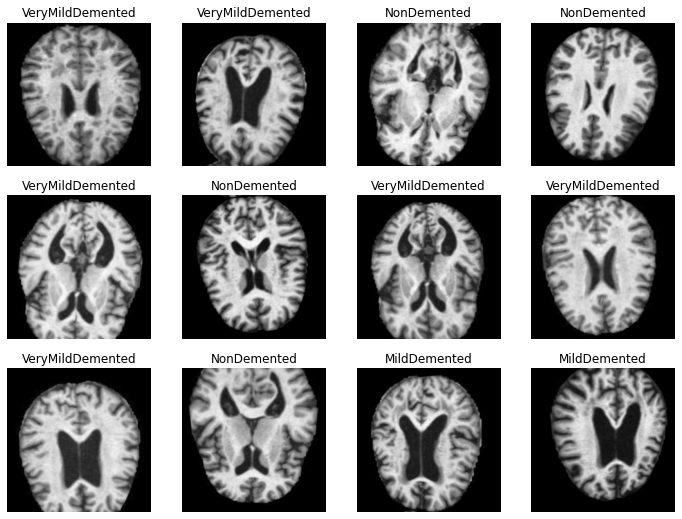

In [6]:
dls.show_batch(max_n=12,nrows=3)
dls.vocab

In [7]:
learn = cnn_learner(dls,resnet50,metrics=accuracy)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.860564,1.168688,0.581903,09:48


epoch,train_loss,valid_loss,accuracy,time
0,1.216981,0.887913,0.632605,02:10
1,1.020313,0.841025,0.641966,02:08
2,0.826812,0.641357,0.719189,02:08
3,0.666414,0.498074,0.803432,02:08
4,0.481858,0.502172,0.808112,02:08
5,0.349823,0.336450,0.868175,02:08
6,0.245416,0.271397,0.898596,02:08
7,0.183194,0.259035,0.911856,02:08
8,0.135662,0.208348,0.925117,02:08
9,0.107628,0.178701,0.936817,02:08


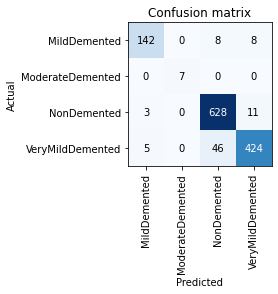

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

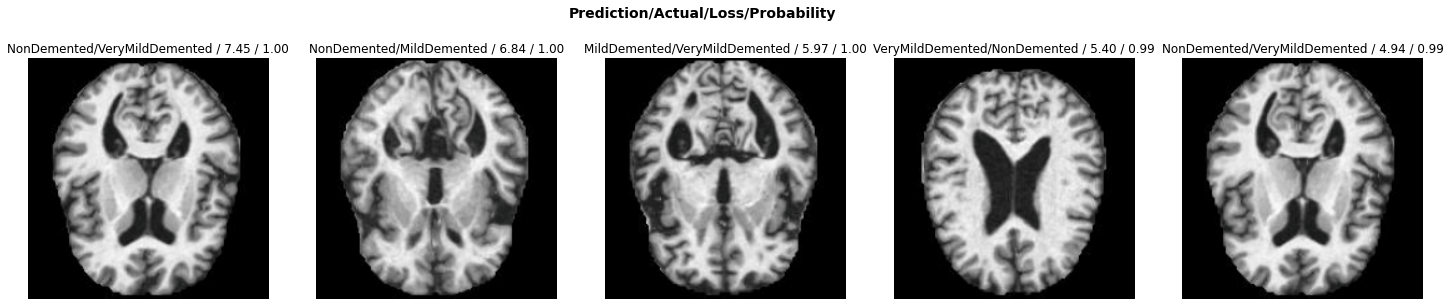

In [9]:
interp.plot_top_losses(5, nrows=1, figsize = (25,5))

In [10]:
from fastai.vision.widgets import *
btn_run = widgets.Button(description='Classify')

In [11]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [12]:
btn_upload = widgets.FileUpload()

out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [13]:
VBox([widgets.Label('Select a X-ray'),btn_upload, btn_run, out_pl, lbl_pred])


In [14]:
learn.predict("/content/drive/MyDrive/Alzheimer_s Dataset/test/ModerateDemented/28 (2).jpg")

('ModerateDemented',
 TensorBase(1),
 TensorBase([8.3046e-04, 9.9916e-01, 3.9726e-06, 7.9936e-07]))

In [ ]:
#save the model

learn.export('Alzh-sheekar-fast-ai.h5')